<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-1/blob/main/ML_1_SVM_%26_KNN_Modeling_Obesity_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
'''
link to dataset: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
'''
obesity=pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
obesity.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


Rename the columns

In [3]:
# Dictionary to map old column names to new names
new_column_names = {
    'Gender': 'gender',
    'Age': 'age',
    'Height': 'height',
    'Weight': 'weight',
    'family_history_with_overweight': 'family_history',
    'FAVC': 'frequent_fast_food',
    'FCVC': 'vegetable_consumption',
    'NCP': 'meals_per_day',
    'CAEC': 'snack_habits',
    'SMOKE': 'smoking_status',
    'CH2O': 'water_intake',
    'SCC': 'calorie_tracking',
    'FAF': 'physical_activity',
    'TUE': 'screen_time',
    'CALC': 'alcohol_consumption',
    'MTRANS': 'transportation_mode',
    'NObeyesdad': 'obesity_grouping'
}

# Rename columns
obesity.rename(columns=new_column_names, inplace=True)

# Display updated column names
print(obesity.columns)


Index(['gender', 'age', 'height', 'weight', 'family_history',
       'frequent_fast_food', 'vegetable_consumption', 'meals_per_day',
       'snack_habits', 'smoking_status', 'water_intake', 'calorie_tracking',
       'physical_activity', 'screen_time', 'alcohol_consumption',
       'transportation_mode', 'obesity_grouping'],
      dtype='object')


In [4]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 2111 non-null   object 
 1   age                    2111 non-null   float64
 2   height                 2111 non-null   float64
 3   weight                 2111 non-null   float64
 4   family_history         2111 non-null   object 
 5   frequent_fast_food     2111 non-null   object 
 6   vegetable_consumption  2111 non-null   float64
 7   meals_per_day          2111 non-null   float64
 8   snack_habits           2111 non-null   object 
 9   smoking_status         2111 non-null   object 
 10  water_intake           2111 non-null   float64
 11  calorie_tracking       2111 non-null   object 
 12  physical_activity      2111 non-null   float64
 13  screen_time            2111 non-null   float64
 14  alcohol_consumption    2111 non-null   object 
 15  tran

In [5]:
obesity.isnull().sum()

,0
gender,0
age,0
height,0
weight,0
family_history,0
frequent_fast_food,0
vegetable_consumption,0
meals_per_day,0
snack_habits,0
smoking_status,0


# DATA ANALYSIS

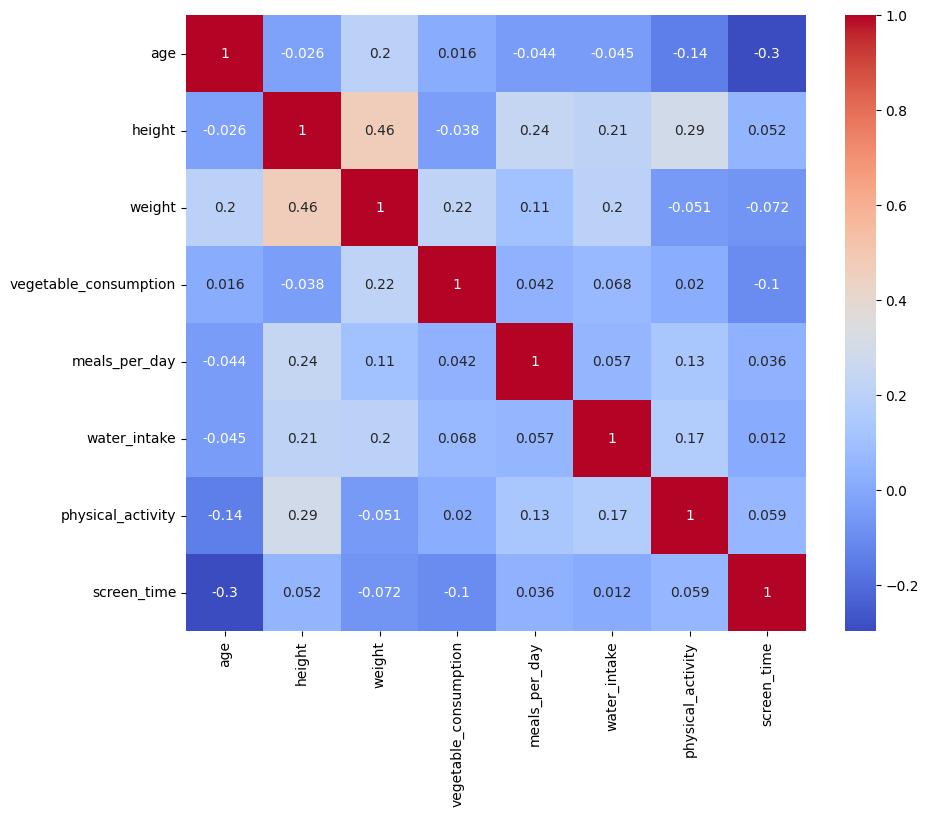

In [6]:
# Select only float or integer columns
numeric_data = obesity.select_dtypes(include=['float64', 'int64'])

# Plot heatmap for the correlation matrix of numeric columns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True)
plt.show()

# DATA ENCODING

In [7]:
obesity.columns

Index(['gender', 'age', 'height', 'weight', 'family_history',
       'frequent_fast_food', 'vegetable_consumption', 'meals_per_day',
       'snack_habits', 'smoking_status', 'water_intake', 'calorie_tracking',
       'physical_activity', 'screen_time', 'alcohol_consumption',
       'transportation_mode', 'obesity_grouping'],
      dtype='object')

In [8]:
obesity['obesity_grouping'].value_counts()

,count
obesity_grouping,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


Encoding techniques for columns:

- One-hot encoding: gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad

- Already numeric(don't encode): age, height, weight, FCVC, NCP, CH2O, FAF, TUE

In [9]:
# applying encoding techniques:

# List of columns to apply one-hot encoding
categorical_columns = ['gender', 'family_history', 'frequent_fast_food', 'snack_habits',
                       'smoking_status', 'calorie_tracking', 'alcohol_consumption', 'transportation_mode', 'obesity_grouping']

# Apply one-hot encoding using pandas get_dummies
obesity_encoded = pd.get_dummies(obesity, columns=categorical_columns, drop_first=True)

# Display the first few rows of the updated DataFrame
print(obesity_encoded.head())


    age  height  weight  vegetable_consumption  meals_per_day  water_intake  \
0  21.0    1.62    64.0                    2.0            3.0           2.0   
1  21.0    1.52    56.0                    3.0            3.0           3.0   
2  23.0    1.80    77.0                    2.0            3.0           2.0   
3  27.0    1.80    87.0                    3.0            3.0           2.0   
4  22.0    1.78    89.8                    2.0            1.0           2.0   

   physical_activity  screen_time  gender_Male  family_history_yes  ...  \
0                0.0          1.0        False                True  ...   
1                3.0          0.0        False                True  ...   
2                2.0          1.0         True                True  ...   
3                2.0          0.0         True               False  ...   
4                0.0          0.0         True               False  ...   

   transportation_mode_Bike  transportation_mode_Motorbike  \
0           

In [10]:
# convert 'bool' columns to ones and zeros
#obesity_encoded['frequent_fast_food'] = obesity_encoded['frequent_fast_food'].astype(int)
obesity_encoded.columns

Index(['age', 'height', 'weight', 'vegetable_consumption', 'meals_per_day',
       'water_intake', 'physical_activity', 'screen_time', 'gender_Male',
       'family_history_yes', 'frequent_fast_food_yes',
       'snack_habits_Frequently', 'snack_habits_Sometimes', 'snack_habits_no',
       'smoking_status_yes', 'calorie_tracking_yes',
       'alcohol_consumption_Frequently', 'alcohol_consumption_Sometimes',
       'alcohol_consumption_no', 'transportation_mode_Bike',
       'transportation_mode_Motorbike',
       'transportation_mode_Public_Transportation',
       'transportation_mode_Walking', 'obesity_grouping_Normal_Weight',
       'obesity_grouping_Obesity_Type_I', 'obesity_grouping_Obesity_Type_II',
       'obesity_grouping_Obesity_Type_III',
       'obesity_grouping_Overweight_Level_I',
       'obesity_grouping_Overweight_Level_II'],
      dtype='object')

In [11]:
obesity_encoded

,age,height,weight,vegetable_consumption,meals_per_day,water_intake,physical_activity,screen_time,gender_Male,family_history_yes,...,transportation_mode_Bike,transportation_mode_Motorbike,transportation_mode_Public_Transportation,transportation_mode_Walking,obesity_grouping_Normal_Weight,obesity_grouping_Obesity_Type_I,obesity_grouping_Obesity_Type_II,obesity_grouping_Obesity_Type_III,obesity_grouping_Overweight_Level_I,obesity_grouping_Overweight_Level_II
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,False,True,...,False,False,True,False,True,False,False,False,False,False
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,False,True,...,False,False,True,False,True,False,False,False,False,False
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,True,True,...,False,False,True,False,True,False,False,False,False,False
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,True,False,...,False,False,False,True,False,False,False,False,True,False
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,True,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,False,True,...,False,False,True,False,False,False,False,True,False,False
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,False,True,...,False,False,True,False,False,False,False,True,False,False
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,False,True,...,False,False,True,False,False,False,False,True,False,False
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,False,True,...,False,False,True,False,False,False,False,True,False,False


**Converting Boolean True/False to ones and zeroes**

In [12]:
# Convert all boolean columns to integers (True -> 1, False -> 0)
obesity = obesity_encoded.astype(int)

# Display the first few rows of the updated DataFrame
print(obesity.head())


   age  height  weight  vegetable_consumption  meals_per_day  water_intake  \
0   21       1      64                      2              3             2   
1   21       1      56                      3              3             3   
2   23       1      77                      2              3             2   
3   27       1      87                      3              3             2   
4   22       1      89                      2              1             2   

   physical_activity  screen_time  gender_Male  family_history_yes  ...  \
0                  0            1            0                   1  ...   
1                  3            0            0                   1  ...   
2                  2            1            1                   1  ...   
3                  2            0            1                   0  ...   
4                  0            0            1                   0  ...   

   transportation_mode_Bike  transportation_mode_Motorbike  \
0                 

# DATA ANALYSIS

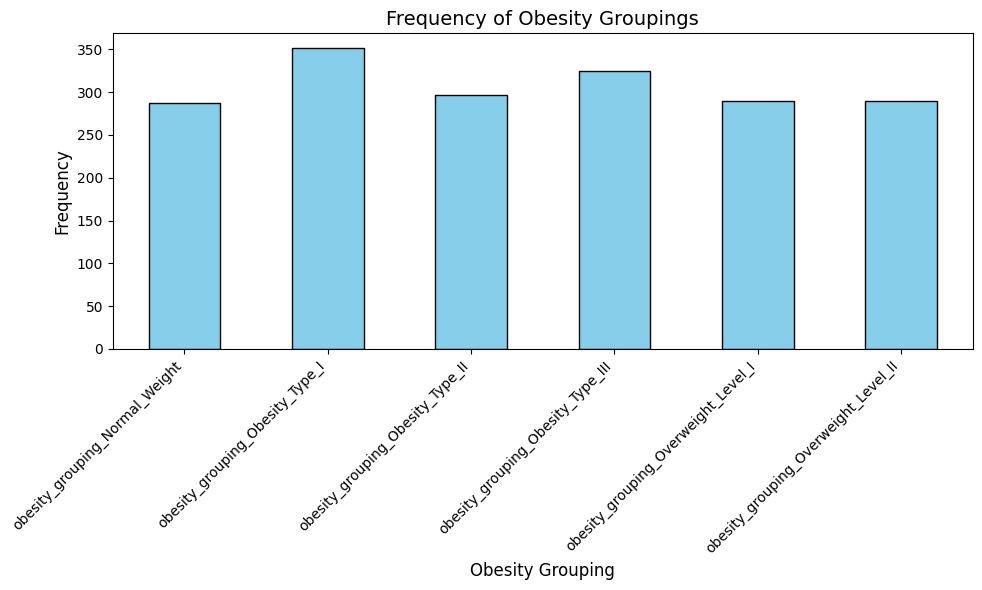

In [13]:
# Extract columns related to obesity grouping
obesity_columns = [
    'obesity_grouping_Normal_Weight',
    'obesity_grouping_Obesity_Type_I',
    'obesity_grouping_Obesity_Type_II',
    'obesity_grouping_Obesity_Type_III',
    'obesity_grouping_Overweight_Level_I',
    'obesity_grouping_Overweight_Level_II'
]

obesity_counts = obesity[obesity_columns].sum() # Calculate the sum (frequency) for each obesity grouping

plt.figure(figsize=(10, 6))
obesity_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Frequency of Obesity Groupings', fontsize=14)
plt.xlabel('Obesity Grouping', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


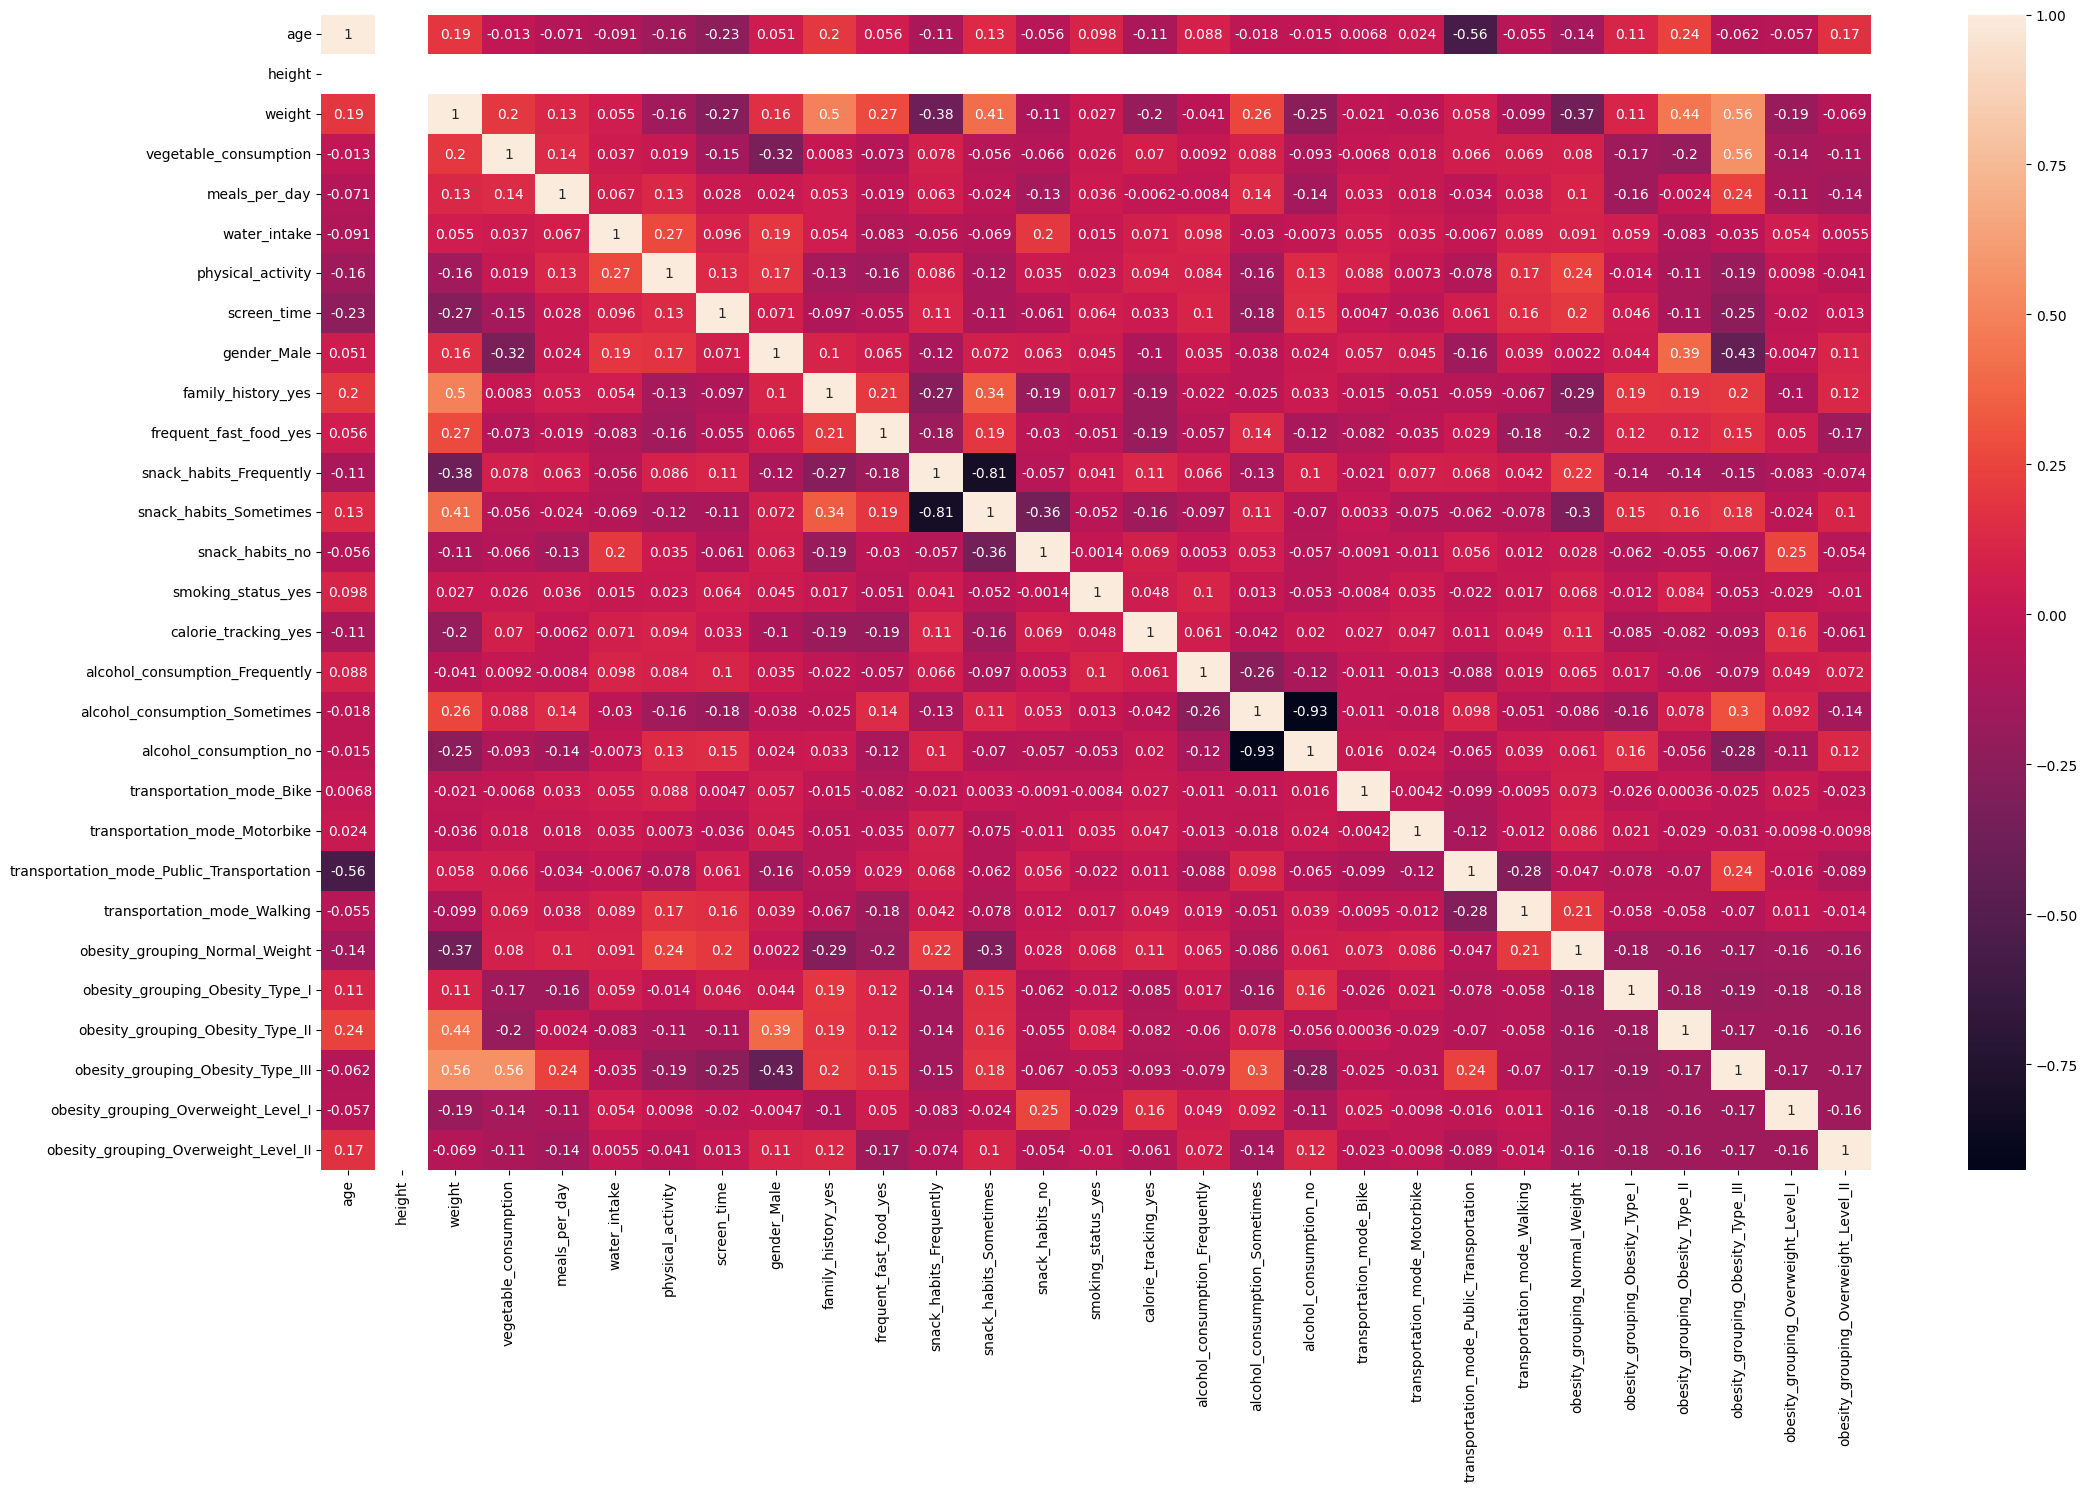

In [16]:
#Creatinga heatmap to show correlatoin
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(obesity.corr(), annot=True)
plt.show()

# Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split

# Features: All columns except obesity grouping
feature_columns = [
    'age', 'height', 'weight', 'vegetable_consumption', 'meals_per_day',
    'water_intake', 'physical_activity', 'screen_time', 'gender_Male',
    'family_history_yes', 'frequent_fast_food_yes',
    'snack_habits_Frequently', 'snack_habits_Sometimes', 'snack_habits_no',
    'smoking_status_yes', 'calorie_tracking_yes',
    'alcohol_consumption_Frequently', 'alcohol_consumption_Sometimes',
    'alcohol_consumption_no', 'transportation_mode_Bike',
    'transportation_mode_Motorbike',
    'transportation_mode_Public_Transportation',
    'transportation_mode_Walking'
]

# Target: Combine one-hot encoded obesity groupings into a single column
obesity['obesity_group'] = obesity[['obesity_grouping_Normal_Weight',
                          'obesity_grouping_Obesity_Type_I',
                          'obesity_grouping_Obesity_Type_II',
                          'obesity_grouping_Obesity_Type_III',
                          'obesity_grouping_Overweight_Level_I',
                          'obesity_grouping_Overweight_Level_II']].idxmax(axis=1)

# Remove the prefix from the target values for readability
obesity['obesity_group'] = obesity['obesity_group'].str.replace('obesity_grouping_', '')

# Split the dataset into features (X) and target (y)
X = obesity[feature_columns]
y = obesity['obesity_group']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1688, 23), y_train shape: (1688,)
X_test shape: (423, 23), y_test shape: (423,)


# SVM Modeling

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [19]:
svm = make_pipeline(StandardScaler(), SVC(C=1.5))
scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)

[0.85798817 0.88757396 0.88461538 0.85756677 0.89910979]
0.8773708145312803


In [20]:
svm = make_pipeline(StandardScaler(), SVC(C=0.5, kernel='linear'))
scores = cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)


[0.86390533 0.89349112 0.82840237 0.85207101 0.81656805 0.86982249
 0.85207101 0.84615385 0.81547619 0.89285714]
0.8530818540433925


# KNeighborsClassifier Modeling

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)

[0.79881657 0.83727811 0.82840237 0.8041543  0.85459941]
0.8246501501237864


In [23]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7, weights='distance', p=2))
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)

[0.82840237 0.86390533 0.85502959 0.83086053 0.86053412]
0.8477463873720437
